In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

2022-08-02 17:16:03.233776: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-02 17:16:03.233818: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [16]:
data_source = "alphavantage"

if data_source == "alphavantage":
    api_key = "O6KDMU7EZULUOI79"
#     ticker = "MOS"  # Mosaic
    ticker = "C"  # Citigroup
    # JSON file with all the stock market data for AAL from the last 20 years
    url_string = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=full&apikey={api_key}"

    # Save data to this file
    file_to_save = f"stock_market_data-{ticker}.csv"

    # if data isn't saved, grab from url
    # store date, low, high, volume, close, open values in a dataframe
    if not os.path.exists(file_to_save):
        with urllib.request.urlopen(url_string) as url:
            data = json.loads(url.read().decode())
            # extract stock data
            data = data["Time Series (Daily)"]
            df = pd.DataFrame(columns=["Date", "Low", "High", "CLose", "Open"])
            for k,v in data.items():
                date = dt.datetime.strptime(k, "%Y-%m-%d")
                data_row = [date.date(), float(v["3. low"]), float(v["2. high"]),
                            float(v["4. close"]), float(v["1. open"])]
                df.loc[-1, :] = data_row
                df.index = df.index + 1
        print(f"Data saved to : {file_to_save}")
    # If data already exists, load from csv
    else:
        print("File already exists, loading data from CSV")
        df = pd.read_csv(file_to_save)

Data saved to : stock_market_data-C.csv


In [17]:
df.head()

Date      Low    High  CLose   Open
5724  2022-08-02    50.73    52.1  50.75  51.76
5723  2022-08-01    51.14  52.205  51.92  51.49
5722  2022-07-29     51.5   52.25   51.9  51.72
5721  2022-07-28    51.31  52.715  52.23  52.09
5720  2022-07-27  51.3199  52.705  52.35   51.7

In [18]:
# Sort dataframe by Date
df = df.sort_values("Date")

In [19]:
df.head()

Date    Low   High  CLose   Open
0  1999-11-01  53.06  54.25  53.38  53.75
1  1999-11-02  53.38  54.75  53.69   53.5
2  1999-11-03  52.69  54.88   53.0  54.88
3  1999-11-04  53.06  55.06  54.75  54.19
4  1999-11-05   54.0  55.25  54.38  54.69

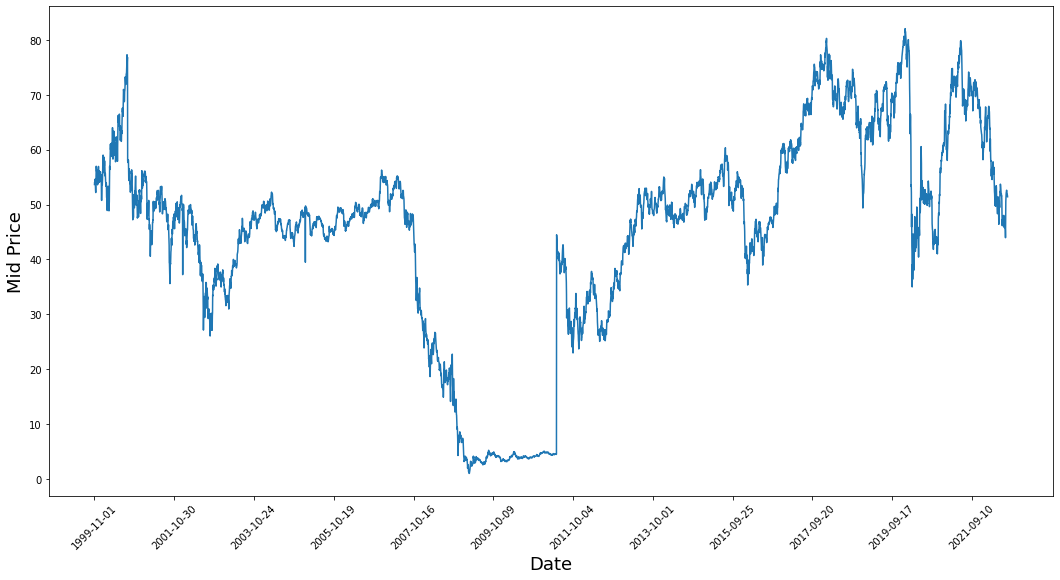

In [20]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]), (df["Low"]+df["High"])/2.0)
plt.xticks(range(0,df.shape[0],500), df["Date"].loc[::500], rotation=45)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Mid Price", fontsize=18)
plt.show()